In [1]:
import numpy as np, libstempo as LT, json, libstempo.toasim as LTT, libstempo.plot as LP
import astroabc
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline

# Define data and simulation function

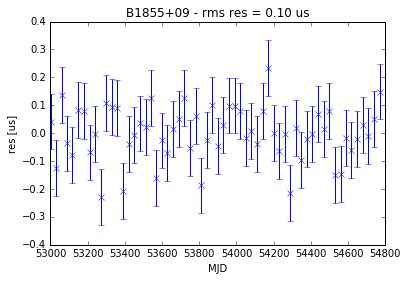

In [2]:
parfile = '../NANOGrav-DWG/11yr_stochastic_analysis/nano11y_data/partim/B1855+09_NANOGrav_11yv0.gls.par'

epochs = np.arange(53000,54800,30)+np.random.randn(60)  # observe every 30+-1 days

psr = LTT.fakepulsar(parfile=parfile,
                    obstimes=epochs,
                    toaerr=0.1)

LTT.add_efac(psr,efac=1.0,seed=1234)
LP.plotres(psr)

data = psr.toas()

In [3]:
def simulation(params):
    
    #params should be: par_file, epochs, efac
    psr_copy = LTT.fakepulsar(parfile = parfile,
                    obstimes=epochs,  # observe every 30+-1 days
                    toaerr=0.1)
    
    #add white noise:
    LTT.add_efac(psr_copy, efac = params[0])
    #LTT.add_equad(psr_copy, equad = params[2])
    #LTT.add_jitter(psr_copy, ecorr = params[3])
    
    #add red noise, to be varied later
    #LTT.add_rednoise(psr_copy, params[4], params[5])
    
    return psr_copy.toas()

# Define distance function and see how it varies

In [5]:
def dist_metric(d, x):
    return np.sum(np.abs(d - x))

In [7]:
test_efacs = np.linspace(0.0, 5.0, 10)

distances = np.full((len(test_efacs)), 0.0)

for ii, val in enumerate(test_efacs):
    
    distances[ii] = dist_metric(data, simulation([val]))

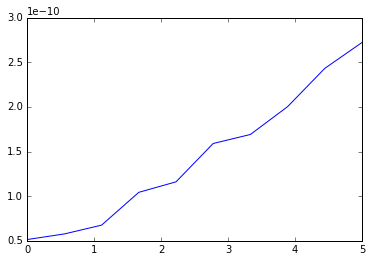

In [8]:
pl.plot(test_efacs, distances)
pl.show()